TASK LINK : https://www.kaggle.com/imuhammad/persian-artists-on-spotfiy/tasks?taskId=5595

# STEPS : 

1.Understanding Dataset

2.Data Perprocessing

2.1.Delete Some Columns

2.3.Incode Categorical Data

2.3.1.Incode Dependent Values

2.3.2.Incode Independent Values

2.4.Taking Care Of Missing Data

3.Analysis Of Relationship

4.Create Model

4.1.Splitting The Dataset Into The Training Set and Test Set

4.2.Random Forest

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Spotfiy_Persian_Artists.csv')

# 1.Understanding Dataset

In [3]:
df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [4]:
df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10632 entries, 0 to 10631
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            10632 non-null  object 
 1   disc_number         10632 non-null  int64  
 2   duration_ms         10632 non-null  int64  
 3   explicit            10632 non-null  bool   
 4   track_name          10632 non-null  object 
 5   track_name_farsi    612 non-null    object 
 6   artist_name         10632 non-null  object 
 7   artist_name_farsi   10632 non-null  object 
 8   popularity          931 non-null    float64
 9   track_number        10632 non-null  int64  
 10  album_href          931 non-null    object 
 11  album_id            10632 non-null  object 
 12  album_name          10632 non-null  object 
 13  album_release_date  10632 non-null  object 
 14  album_total_tracks  931 non-null    float64
 15  album_release_year  10632 non-null  int64  
 16  trac

In [6]:
df.nunique()

track_id              10277
disc_number               4
duration_ms            8510
explicit                  2
track_name             7586
track_name_farsi        370
artist_name              69
artist_name_farsi        69
popularity               46
track_number             32
album_href              386
album_id               2443
album_name             2097
album_release_date     1585
album_total_tracks       28
album_release_year       44
track_href            10277
danceability            801
energy                 1220
key                      12
loudness               6988
mode                      2
speechiness            1059
acousticness           1587
instrumentalness       3391
liveness               1297
valence                1207
tempo                  8521
time_signature            5
key_name                 12
mode_name                 2
key_mode                 24
dtype: int64

## 1.2.Feature Details

track_id : The ID of track in Spotfiy.

disc_number : In Some of album ,especially old album that released on CD, 
    we observe that this album recorded on more than a disk;
    so this feature show that this track recorded in witch CD. 

duration_ms : Duration is an amount of time or how long or short a note, phrase, section, or composition lasts. 

explicit : An explicit track is one that has curse words or language or art that is sexual,
    violent, or offensive in nature.

popularity : the popularity of track or album 

track_number : the number of track in album.

album_id : The ID of album in Spotfiy.

album_total_tracks : The number of tracks that exist in an album.

album_release_date : The date that album released.

album_release_year : The year that album released.

track_href : api of track

album_href : api of album

danceability : Danceability describes how suitable a track is for dancing based 
    on a combination of musical elements including tempo
    , rhythm stability, beat strength,
    and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

energy : represents a perceptual measure of intensity and activity.
    Typically, energetic tracks feel fast, loud, and noisy

loudness : represents loudness of music 

mode : the term mode or modus is used in a number of distinct senses, depending on context.

Speechiness: Speechiness detects the presence of spoken words in a track.
    If the speechiness of a song is above 0.66, it is probably made of spoken words, 
    a score between 0.33 and 0.66 is a song that may contain both music and words
    , and a score below 0.33 means the song does not have any speech.

acousticness :  This value describes how acoustic a song is.
    `A score of 1.0 means the song is most likely to be an acoustic one.

instrumentalness : This value represents the amount of vocals in the song. The closer it is to 1.0,
    the more instrumental the song is.

liveness: This value describes the probability that the song was recorded with a live audience.
    According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”

valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), 
    while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

tempo : In musical terminology, tempo is the speed or pace of a given piece. In classical music, tempo is typically indicated with an instruction at the start of a piece and is usually measured in beats per minute.


# 2.Data Perprocessing

## 2.1.Delete Some Columns

we delete tree groups of colums :


1. columns with a lot of missing values because we cant replace missing value with values that we achive from statistical methods so I think its better to delete them , like 'popularity' column.

 2. columns are include values that havent usefull infotmation like 'artist_name_farsi' 

 3. columns that contain some information that exist in the other columns , for instance each of cell of 'key_mode' comined information from  'mode_name' and 'key_name'

In [7]:
for i in ['track_id' , 'track_name_farsi' ,  'artist_name_farsi' , 'album_href' ,'track_href', 'album_total_tracks' 
, 'track_name' , 'popularity' ,  'album_id' , 'key_mode' , 'album_release_date'] :
     df.pop(i)

## 2.2.creating matrix of features(x) and dependet variable vector(y)

In [8]:
predict_column = df.pop('tempo')
df.insert(0 , 'tempo' ,predict_column)

'''
in this code I move tempo columns into the first place in dataframe , I think It's better than using pd.merge(for crating x)
'''

x = df.iloc[:,1:].values
y = df.iloc[:,1].values

## 2.3.Incode Categorical Data

### 2.3.1.Incode Dependent Values

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
index =  [-1,-2]
for i in index:
    x[:,i] = le.fit_transform(x[:,i])

### 2.3.2.Incode Independent Values

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,5])], remainder='passthrough', sparse_threshold=0)
x= np.array(ct.fit_transform(x))

## 2.4.Taking Care Of Missing Data 

<AxesSubplot:>

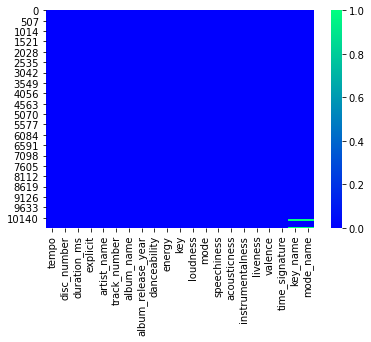

In [11]:
sns.heatmap(df.isnull() ,cmap='winter')

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, -3:])
x[:, -3:] = imputer.transform(x[:, -3:])

# 3.Analysis Of Relationship

<AxesSubplot:>

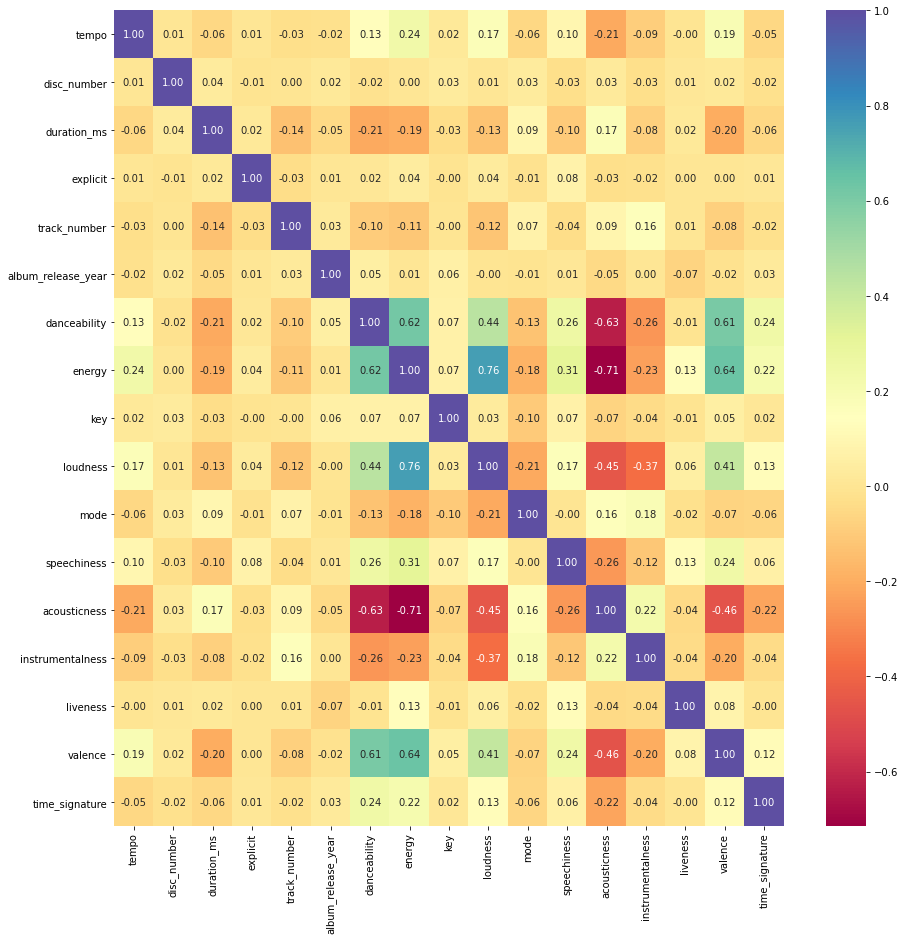

In [13]:
corelation_matrix = df.corr()

plt.figure(figsize=(15,15))

sns.heatmap(corelation_matrix , xticklabels = corelation_matrix.columns 
            , yticklabels = corelation_matrix.columns , annot = True,cmap='Spectral', fmt='.2f' )

# 4.Create Model

## 4.1.Splitting The Dataset Into The Training Set and Test Set

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

## 4.2.Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score

regressor = RandomForestRegressor(n_estimators = 250 , random_state = 42 )
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
accuracy_score(y_test, y_pred)*100

100.0

<AxesSubplot:>

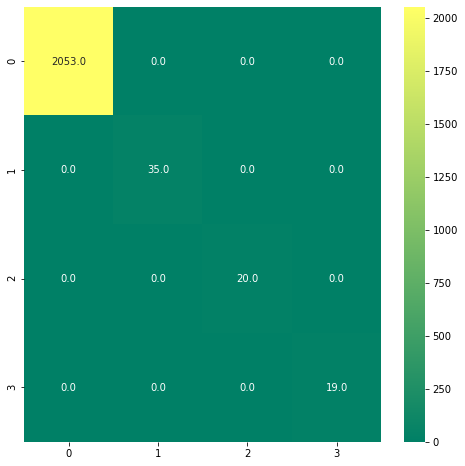

In [16]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap='summer', annot=True, fmt='.1f')